In [19]:
#importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## For Preprocessing
from sklearn.preprocessing import StandardScaler

## Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## To evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
## Importing diabetes dataset 
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
#printing information about our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
#Calculating statistical data of our dataframe.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
#Correlation between our data.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

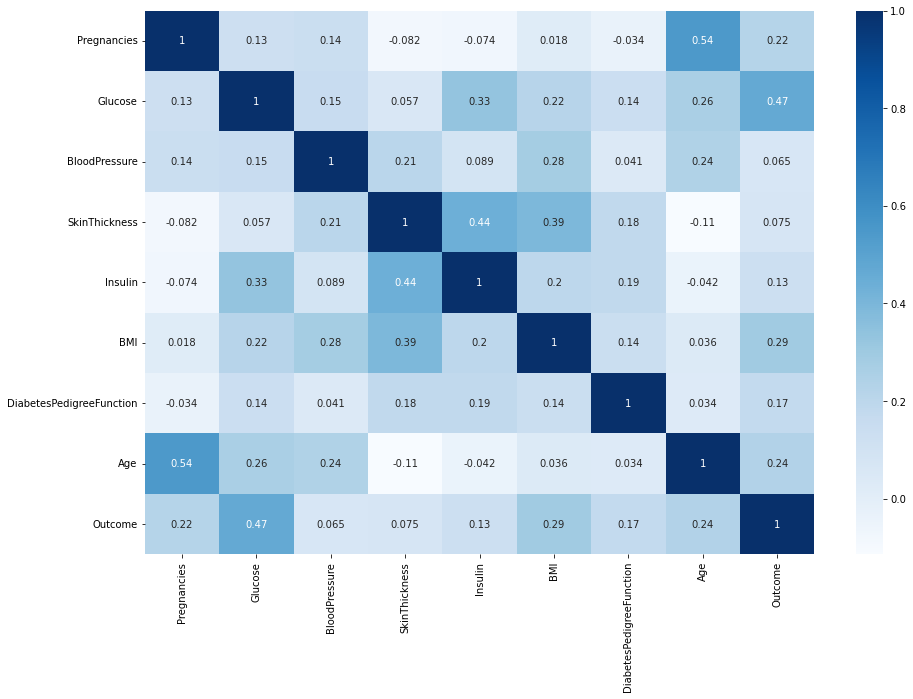

In [35]:
#Heatmap of the correlation.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [36]:
#Checking any null values in dataset.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
#Storing Features and Outcome in X & y respectively.
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
#Viewing values in X.
X

In [29]:
#finding the shape/dimensions of X.
X.shape

(768, 8)

In [154]:
#finding the shape/dimensions of y.
y.shape

(768,)

In [155]:
#Counting value of each class.
np.bincount(y)

array([500, 268], dtype=int64)

In [156]:
#Displaying each class along with its value counts.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

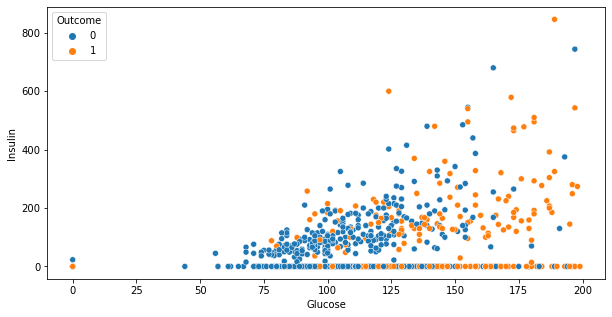

In [77]:
#plotting glucose levels with BMI.
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Glucose'],y=df['Insulin'],hue=df['Outcome'])

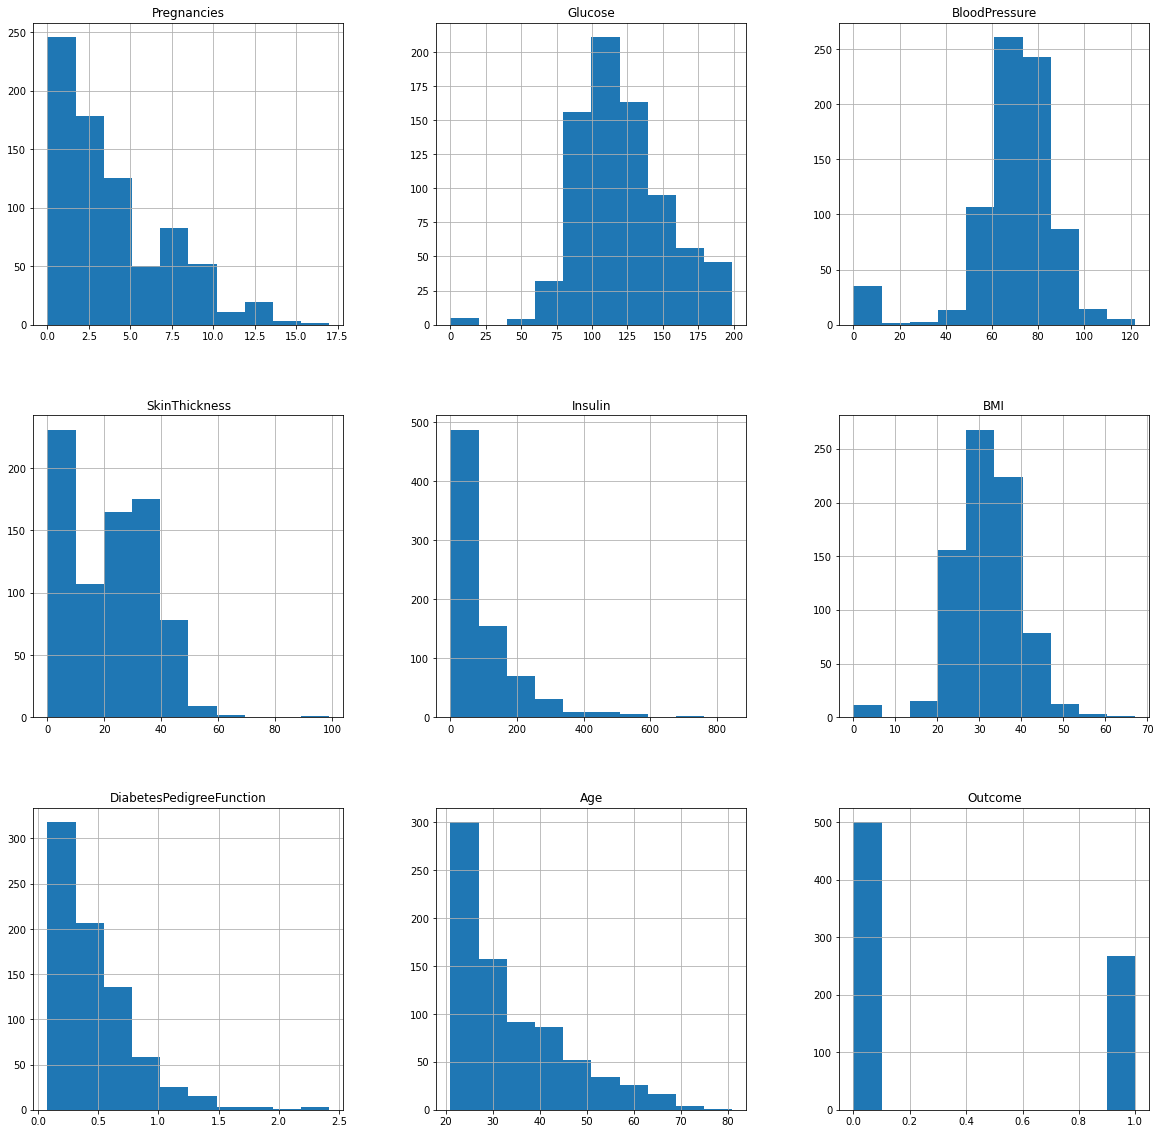

In [79]:
#Plotting the data distribution plots
p = df.hist(figsize = (20,20))

## Train Test Data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling using StandardScaler

In [81]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)
X_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [82]:
#Displaying dataframe after feature scaling.
newData = pd.DataFrame(X_train, columns=df.columns[0:8])
newData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.908329,0.915694,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558
1,0.036447,-0.751822,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692
2,-1.126063,1.387632,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403
3,-0.835435,-0.374271,-0.677062,0.023456,0.450299,-0.886043,1.100914,-0.882403
4,1.198956,-0.028183,-3.543717,-1.285816,-0.699657,-0.279050,-0.851438,0.366933


## Logistic Regression Technique-:

In [83]:
Log = LogisticRegression(max_iter=500)
Log.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [84]:
#predicting model on test data.
pred_1 = Log.predict(X_test)
pred_1

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [85]:
#confusion matrix.
cm_1 = confusion_matrix(y_test, pred_1)
cm_1

array([[98,  9],
       [18, 29]], dtype=int64)

In [86]:
#Accuracy score for Logistic Regression model.
accuracy_score(y_test, pred_1)

0.8246753246753247

## Random Forest Technique:-

In [164]:
rf = RandomForestClassifier(criterion = 'entropy',random_state = 0,n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [165]:
#predicting model on test data.
pred_2 = rf.predict(X_test)

In [166]:
#confusion matrix.
cm_2 = confusion_matrix(y_test, pred_2)
cm_2

array([[95, 12],
       [20, 27]], dtype=int64)

In [167]:
#Accuracy score for Random Forest model.
accuracy_score(y_test, pred_2)

0.7922077922077922

## KNN Technique:-

In [168]:
knn = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [169]:
#predicting model on test data.
pred_3 = knn.predict(X_test)

In [170]:
#confusion matrix.
cm_3 = confusion_matrix(y_test, pred_3)
cm_3

array([[93, 14],
       [17, 30]], dtype=int64)

In [171]:
#Accuracy score for KNN model.
accuracy_score(y_test, pred_3)

0.7987012987012987

## Support Vector Machine (SVC) Technique:-

In [172]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [173]:
#predicting model on test data.
pred_4 = svc.predict(X_test)

In [174]:
#confusion matrix.
cm_4 = confusion_matrix(y_test, pred_4)
cm_4

array([[96, 11],
       [21, 26]], dtype=int64)

In [175]:
#Accuracy score for SVC model.
accuracy_score(y_test, pred_4)

0.7922077922077922

Hence the accuracy of each model is as follows: 
1. Logistic Regression : 82.5%
2. Random Forest       : 79.2%
3. KNN                 : 79.9%
4. SVC                 : 79.2%

**Therefore we find that our Logistic Regressions Model serves the best for predicting diabetes in a patient.

In [87]:
#Predicting a user entered data using Logistic Regression Model:
Log.predict([[0,137,40,35,168,43.1,2.228,33]])

array([1], dtype=int64)